In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import os
import matplotlib.patches as mpatches
import matplotlib.patches as patches

In [2]:
from matplotlib import font_manager, rc
font = 'Arial'
plt.rcParams['font.family'] = font

 # Real data

In [3]:
data=pd.read_csv('total_data.csv')

In [4]:
start_year=2009
end_year=2018
TT_year=2016

In [5]:
data=data[(data['Year']>=start_year) & (data['Year']<=end_year)]
data.index=range(len(data))

In [6]:
data_train=data[data['Year']<=TT_year]
data_train.index=range(len(data_train))
data_test=data[data['Year']>TT_year]
data_test.index=range(len(data_test))

In [8]:
!pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


# TEST

# SVM

In [9]:
SVM_test=pd.read_excel('./result_excel/level_SVM_test.xlsx')

In [10]:
df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

SVM_test['alarm']=0

for i in range(0,2):
    df_list[i]=SVM_test[SVM_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
SVM_test=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2070761595.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [11]:
SVM_test[SVM_test['alarm']=='start']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
40,40,0,1,1,1,41,2017,12,3,start,start
95,95,1,1,1,1,43,2018,13,3,start,start


In [12]:
SVM_test[SVM_test['alarm']=='end']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
23,23,1,1,1,1,24,2017,11,3,end,end
71,71,1,1,1,1,19,2018,12,3,end,end


In [13]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

for i in range(0,2):
    df_list[i]=SVM_test[SVM_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
SVM_test=pd.concat(df_list)

0
[23, 23]
[40, 40]
1
[71, 71]
[95, 95]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/112877987.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/112877987.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


# MLP

In [14]:
MLP_test=pd.read_excel('./result_excel/level_MLP_test.xlsx')

In [15]:
df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

MLP_test['alarm']=0

for i in range(0,2):
    df_list[i]=MLP_test[MLP_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
MLP_test=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/3838418058.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [16]:
MLP_test[MLP_test['alarm']=='start']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
41,41,0,1,1,1,42,2017,12,3,NaN,start
95,95,1,1,1,1,43,2018,13,3,stat,start


In [17]:
MLP_test[MLP_test['alarm']=='end']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
23,23,1,1,1,1,24,2017,11,3,end,end
71,71,1,1,1,1,19,2018,12,3,end,end


In [18]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

for i in range(0,2):
    df_list[i]=MLP_test[MLP_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
MLP_test=pd.concat(df_list)

0
[23, 23]
[40, 41]
1
[71, 71]
[95, 95]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/252423207.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/252423207.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


# RF

In [19]:
RF_test=pd.read_excel('./result_excel/level_RF_test.xlsx')

In [20]:
df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

RF_test['alarm']=0

for i in range(0,2):
    df_list[i]=RF_test[RF_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
RF_test=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2347543082.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [21]:
RF_test[RF_test['alarm']=='start']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
41,41,0,1,1,1,42,2017,12,3,NaN,start
95,95,1,1,1,1,43,2018,13,3,start,start


In [22]:
RF_test[RF_test['alarm']=='end']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
23,23,1,1,1,1,24,2017,11,3,end,end
71,71,1,1,1,1,19,2018,12,3,end,end


In [23]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

for i in range(0,2):
    df_list[i]=RF_test[RF_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
RF_test=pd.concat(df_list)

0
[23, 23]
[40, 41]
1
[71, 71]
[95, 95]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/701852799.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/701852799.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


# GB

In [24]:
GB_test=pd.read_excel('./result_excel/level_GB_test.xlsx')

In [25]:
df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

GB_test['alarm']=0

for i in range(0,2):
    df_list[i]=GB_test[GB_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
GB_test=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2359333436.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [26]:
GB_test[GB_test['alarm']=='start']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
43,43,1,1,1,1,44,2017,12,3,NaN,start
94,94,0,1,1,1,42,2018,13,3,start,start


In [27]:
GB_test[GB_test['alarm']=='end']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
23,23,1,1,1,1,24,2017,11,3,end,end
73,73,1,1,1,1,21,2018,12,3,end,end


In [28]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

for i in range(0,2):
    df_list[i]=GB_test[GB_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
GB_test=pd.concat(df_list)

0
[23, 23]
[40, 43]
1
[73, 73]
[94, 94]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/696980412.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/696980412.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


# LSTM

In [29]:
LSTM_test=pd.read_excel('./result_excel/level_LSTM_test.xlsx')

In [30]:
df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

LSTM_test['alarm']=0

for i in range(0,2):
    df_list[i]=LSTM_test[LSTM_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
LSTM_test=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/97150279.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [31]:
LSTM_test[LSTM_test['alarm']=='start']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
40,NaN,0,1,1,1,41,2017,12,3,NaN,start
96,NaN,1,1,1,1,44,2018,13,3,NaN,start


In [32]:
LSTM_test[LSTM_test['alarm']=='end']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
25,NaN,1,1,1,1,26,2017,11,3,end,end
64,NaN,1,1,1,1,12,2018,12,3,NaN,end


In [33]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

for i in range(0,2):
    df_list[i]=LSTM_test[LSTM_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
LSTM_test=pd.concat(df_list)

0
[26, 26]
[39, 40]
1
[74, 74]
[92, 96]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/3568686118.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/3568686118.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


# GRU

In [34]:
GRU_test=pd.read_excel('./result_excel/level_GRU_test.xlsx')

In [35]:
df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

GRU_test['alarm']=0

for i in range(0,2):
    df_list[i]=GRU_test[GRU_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
GRU_test=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2427650872.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [36]:
GRU_test[GRU_test['alarm']=='start']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
42,42,1,1,1,1,43,2017,12,3,NaN,start
95,95,1,1,1,1,43,2018,13,3,NaN,start


In [37]:
GRU_test[GRU_test['alarm']=='end']

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
14,14,1,1,1,1,15,2017,11,3,end,end
65,65,1,1,1,1,13,2018,12,3,end,end


In [38]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(2)]
tmp=[pd.DataFrame() for x in range(2)]

for i in range(0,2):
    df_list[i]=GRU_test[GRU_test['Year']==i+2017]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
GRU_test=pd.concat(df_list)

0
[26, 26]
[39, 42]
1
[74, 74]
[92, 95]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2926107306.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2926107306.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


In [41]:
LSTM_test.tail(50)

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
56,NaN,1,1,1,1,4,2018,12,3,NaN,0
57,NaN,1,1,1,1,5,2018,12,3,NaN,0
58,NaN,1,1,1,1,6,2018,12,3,NaN,0
59,NaN,1,1,1,1,7,2018,12,3,NaN,0
60,NaN,1,1,1,1,8,2018,12,3,NaN,0
61,NaN,1,1,1,1,9,2018,12,3,NaN,0
62,NaN,1,1,1,1,10,2018,12,3,NaN,0
63,NaN,1,1,1,1,11,2018,12,3,NaN,0
64,NaN,1,1,1,1,12,2018,12,3,NaN,end
65,NaN,1,0,1,1,13,2018,12,2,NaN,end


In [42]:
GRU_test.tail(50)

,Unnamed: 0,warning,prediction_95-,prediction,prediction_95+,Week,Year,season,level,Unnamed: 9,alarm
56,56,1,1,1,1,4,2018,12,3,NaN,0
57,57,1,1,1,1,5,2018,12,3,NaN,0
58,58,1,1,1,1,6,2018,12,3,NaN,0
59,59,1,1,1,1,7,2018,12,3,NaN,0
60,60,1,1,1,1,8,2018,12,3,NaN,0
61,61,1,1,1,1,9,2018,12,3,NaN,0
62,62,1,1,1,1,10,2018,12,3,NaN,0
63,63,1,1,1,1,11,2018,12,3,NaN,0
64,64,1,1,1,1,12,2018,12,3,NaN,0
65,65,1,1,1,1,13,2018,12,3,end,end


# end_test

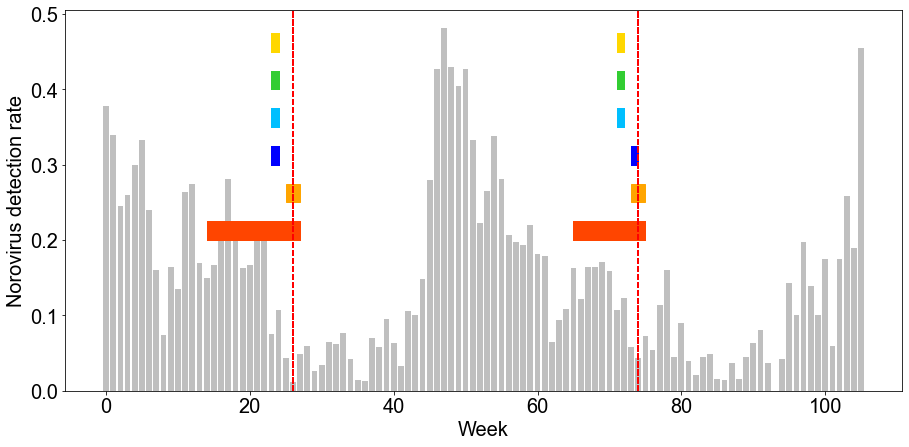

In [94]:
plt.rc('font', size=20)        
plt.rc('axes', labelsize=20)  
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)  
plt.rc('legend', fontsize=15)  
plt.rc('figure', titlesize=50)


tmp=[pd.DataFrame() for x in range(2)] # for real
df_GRU=[pd.DataFrame() for x in range(2)]
df_LSTM=[pd.DataFrame() for x in range(2)]
df_SVM=[pd.DataFrame() for x in range(2)]
df_MLP=[pd.DataFrame() for x in range(2)]
df_RF=[pd.DataFrame() for x in range(2)]
df_GB=[pd.DataFrame() for x in range(2)]

end_LSTM=[pd.DataFrame() for x in range(2)]
end_GRU=[pd.DataFrame() for x in range(2)]
end_SVM=[pd.DataFrame() for x in range(2)]
end_MLP=[pd.DataFrame() for x in range(2)]
end_RF=[pd.DataFrame() for x in range(2)]
end_GB=[pd.DataFrame() for x in range(2)]


#label
GRU_patch=mpatches.Patch(color='orangered',label='GRU')
LSTM_patch=mpatches.Patch(color='orange',label='LSTM')
SVM_patch=mpatches.Patch(color='gold',label='SVM')
MLP_patch=mpatches.Patch(color='limegreen',label='MLP')
RF_patch=mpatches.Patch(color='deepskyblue',label='RF')
GB_patch=mpatches.Patch(color='blue',label='GB')

fig,ax=plt.subplots(figsize=(15,7))
x=range(len(GRU_test))
y=data_test['Rate']
# plt.plot(data_test.index,y,color='b',alpha=0.5)
plt.bar(data_test.index,y,color='gray',alpha=0.5)
# plt.fill_between(x,y,color='g',alpha=0.3)

for i in range(0,2):

    df_GRU[i]=GRU_test[GRU_test['Year']==i+2017]
    df_LSTM[i]=LSTM_test[LSTM_test['Year']==i+2017]
    df_SVM[i]=SVM_test[SVM_test['Year']==i+2017]
    df_MLP[i]=MLP_test[MLP_test['Year']==i+2017]
    df_RF[i]=RF_test[SVM_test['Year']==i+2017]
    df_GB[i]=GB_test[GB_test['Year']==i+2017]
    tmp[i]=df_GRU[i][df_GRU[i]['warning']==0] #real warning

    
    end_GRU[i]=df_GRU[i][df_GRU[i]['alarm']=='end']
    end_LSTM[i]=df_LSTM[i][df_LSTM[i]['alarm']=='end']
    end_SVM[i]=df_SVM[i][df_SVM[i]['alarm']=='end']
    end_MLP[i]=df_MLP[i][df_MLP[i]['alarm']=='end']
    end_RF[i]=df_RF[i][df_RF[i]['alarm']=='end']
    end_GB[i]=df_GB[i][df_GB[i]['alarm']=='end']
    
    for iter in range(len(df_list[i])):
        s1=int(tmp[i].head(1).index.values-1)
        plt.axvline(s1,color='red',linestyle='--')
        
        x_GRU=int(end_GRU[i].head(1).index.values)
        w_GRU=len(end_GRU[i])
        
        x_LSTM=int(end_LSTM[i].head(1).index.values)
        w_LSTM=len(end_LSTM[i])
        
        x_SVM=int(end_SVM[i].head(1).index.values)
        w_SVM=len(end_SVM[i])
        
        x_MLP=int(end_MLP[i].head(1).index.values)
        w_MLP=len(end_MLP[i])
        
        x_GB=int(end_GB[i].head(1).index.values)
        w_GB=len(end_GB[i])
        
        x_RF=int(end_RF[i].head(1).index.values)
        w_RF=len(end_RF[i])        
        
        yy=0.45
        kk=0.05
        h=0.025
        
        SVM_rec=patches.Rectangle((x_SVM,yy),w_SVM,h,color='gold')
        plt.gca().add_patch(SVM_rec)
        
        MLP_rec=patches.Rectangle((x_MLP,yy-kk),w_MLP,h,color='limegreen')
        plt.gca().add_patch(MLP_rec)
        
        RF_rec=patches.Rectangle((x_RF,yy-2*kk),w_RF,h,color='deepskyblue')
        plt.gca().add_patch(RF_rec)

        GB_rec=patches.Rectangle((x_GB,yy-3*kk),w_GB,h,color='blue')
        plt.gca().add_patch(GB_rec)
        
        LSTM_rec=patches.Rectangle((x_LSTM,yy-4*kk),w_LSTM,h,color='orange')
        plt.gca().add_patch(LSTM_rec)
        
        
        GRU_rec=patches.Rectangle((x_GRU,yy-5*kk),w_GRU,0.025,color='orangered')
        plt.gca().add_patch(GRU_rec)

        



plt.xlabel('Week')
plt.ylabel('Norovirus detection rate')
# plt.legend(handles=[SVM_patch, MLP_patch, RF_patch, GB_patch, LSTM_patch, GRU_patch],loc='upper right')
plt.savefig('Fig5_b.tiff',dpi=300,facecolor='white',bbox_inches='tight')

# start_test

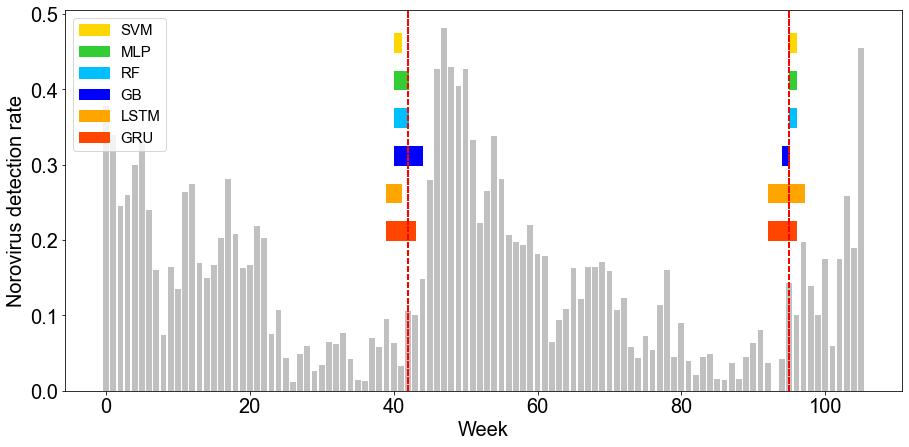

In [92]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

tmp=[pd.DataFrame() for x in range(2)] # for real
df_GRU=[pd.DataFrame() for x in range(2)]
df_LSTM=[pd.DataFrame() for x in range(2)]
df_SVM=[pd.DataFrame() for x in range(2)]
df_MLP=[pd.DataFrame() for x in range(2)]
df_RF=[pd.DataFrame() for x in range(2)]
df_GB=[pd.DataFrame() for x in range(2)]

start_LSTM=[pd.DataFrame() for x in range(2)]
start_GRU=[pd.DataFrame() for x in range(2)]
start_SVM=[pd.DataFrame() for x in range(2)]
start_MLP=[pd.DataFrame() for x in range(2)]
start_RF=[pd.DataFrame() for x in range(2)]
start_GB=[pd.DataFrame() for x in range(2)]


#label
GRU_patch=mpatches.Patch(color='orangered',label='GRU')
LSTM_patch=mpatches.Patch(color='orange',label='LSTM')
SVM_patch=mpatches.Patch(color='gold',label='SVM')
MLP_patch=mpatches.Patch(color='limegreen',label='MLP')
RF_patch=mpatches.Patch(color='deepskyblue',label='RF')
GB_patch=mpatches.Patch(color='blue',label='GB')


fig,ax=plt.subplots(figsize=(15,7))
x=range(len(GRU_test))
y=data_test['Rate']
# plt.plot(data_test.index,y,color='b',alpha=0.5)
plt.bar(data_test.index,y,color='silver')
# plt.fill_between(x,y,color='g',alpha=0.3)

for i in range(0,2):

    df_GRU[i]=GRU_test[GRU_test['Year']==i+2017]
    df_LSTM[i]=LSTM_test[LSTM_test['Year']==i+2017]
    df_SVM[i]=SVM_test[SVM_test['Year']==i+2017]
    df_MLP[i]=MLP_test[MLP_test['Year']==i+2017]
    df_RF[i]=RF_test[SVM_test['Year']==i+2017]
    df_GB[i]=GB_test[GB_test['Year']==i+2017]
    tmp[i]=df_GRU[i][df_GRU[i]['warning']==0] #real warning

    
    start_GRU[i]=df_GRU[i][df_GRU[i]['alarm']=='start']
    start_LSTM[i]=df_LSTM[i][df_LSTM[i]['alarm']=='start']
    start_SVM[i]=df_SVM[i][df_SVM[i]['alarm']=='start']
    start_MLP[i]=df_MLP[i][df_MLP[i]['alarm']=='start']
    start_RF[i]=df_RF[i][df_RF[i]['alarm']=='start']
    start_GB[i]=df_GB[i][df_GB[i]['alarm']=='start']
    
    for iter in range(len(df_list[i])):
        s1=int(tmp[i].tail(1).index.values+1)
        plot1=plt.axvline(s1,color='red',linestyle='--')
        
        x_GRU=int(start_GRU[i].head(1).index.values)
        w_GRU=len(start_GRU[i])
        
        x_LSTM=int(start_LSTM[i].head(1).index.values)
        w_LSTM=len(start_LSTM[i])
        
        x_SVM=int(start_SVM[i].head(1).index.values)
        w_SVM=len(start_SVM[i])
        
        x_MLP=int(start_MLP[i].head(1).index.values)
        w_MLP=len(start_MLP[i])
        
        x_GB=int(start_GB[i].head(1).index.values)
        w_GB=len(start_GB[i])
        
        x_RF=int(start_RF[i].head(1).index.values)
        w_RF=len(start_RF[i])        
        
        yy=0.45
        kk=0.05
        h=0.025
        

        SVM_rec=patches.Rectangle((x_SVM,yy),w_SVM,h,color='gold')
        plt.gca().add_patch(SVM_rec)
        
        MLP_rec=patches.Rectangle((x_MLP,yy-kk),w_MLP,h,color='limegreen')
        plt.gca().add_patch(MLP_rec)
        
        RF_rec=patches.Rectangle((x_RF,yy-2*kk),w_RF,h,color='deepskyblue')
        plt.gca().add_patch(RF_rec)

        GB_rec=patches.Rectangle((x_GB,yy-3*kk),w_GB,h,color='blue')
        plt.gca().add_patch(GB_rec)
        
        LSTM_rec=patches.Rectangle((x_LSTM,yy-4*kk),w_LSTM,h,color='orange')
        plt.gca().add_patch(LSTM_rec)
        
        
        GRU_rec=patches.Rectangle((x_GRU,yy-5*kk),w_GRU,0.025,color='orangered')
        plt.gca().add_patch(GRU_rec)
        
plt.xlabel('Week')
plt.ylabel('Norovirus detection rate')
plt.legend(handles=[SVM_patch, MLP_patch, RF_patch, GB_patch, LSTM_patch, GRU_patch],loc='upper left')
plt.savefig('Fig5_a.tiff',dpi=300,facecolor='white',bbox_inches='tight')


# Train

# SVM

In [56]:
SVM_train=pd.read_excel('./result_excel/level_SVM_train.xlsx')

In [57]:
df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

SVM_train['alarm']=0

for i in range(0,8):
    df_list[i]=SVM_train[SVM_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
SVM_train=pd.concat(df_list)

/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2613563831.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'
/Users/sieunlee/miniforge3/envs/hfmd/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [58]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

for i in range(0,8):
    df_list[i]=SVM_train[SVM_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
SVM_train=pd.concat(df_list)

0
[14, 14]
[42, 42]
1
[70, 70]
[94, 94]
2
[122, 122]
[149, 149]
3
[175, 175]
[200, 200]
4
[224, 224]
[254, 254]
5
[285, 285]
[307, 307]
6
[331, 331]
[360, 360]
7
[386, 386]
[412, 412]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2359577842.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2359577842.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


# MLP

In [59]:
MLP_train=pd.read_excel('./result_excel/level_MLP_train.xlsx')

In [60]:
df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

MLP_train['alarm']=0

for i in range(0,8):
    df_list[i]=MLP_train[MLP_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
MLP_train=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/395315471.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'


In [61]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

for i in range(0,8):
    df_list[i]=MLP_train[MLP_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
MLP_train=pd.concat(df_list)

0
[17, 17]
[42, 42]
1
[72, 72]
[94, 95]
2
[124, 124]
[149, 149]
3
[177, 177]
[200, 200]
4
[228, 228]
[254, 254]
5
[285, 285]
[307, 307]
6
[335, 335]
[358, 360]
7
[386, 386]
[412, 415]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2079640377.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2079640377.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


# RF

In [62]:
RF_train=pd.read_excel('./result_excel/level_RF_train.xlsx')

In [63]:
df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

RF_train['alarm']=0

for i in range(0,8):
    df_list[i]=RF_train[RF_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
RF_train=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2210733454.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'


In [64]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

for i in range(0,8):
    df_list[i]=RF_train[RF_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
RF_train=pd.concat(df_list)

0
[17, 17]
[42, 42]
1
[72, 72]
[94, 95]
2
[124, 124]
[149, 149]
3
[177, 177]
[200, 200]
4
[228, 228]
[254, 254]
5
[285, 285]
[307, 307]
6
[335, 335]
[358, 360]
7
[386, 386]
[412, 415]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/3251599117.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/3251599117.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


# GB

In [65]:
GB_train=pd.read_excel('./result_excel/level_GB_train.xlsx')

In [66]:
df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

GB_train['alarm']=0

for i in range(0,8):
    df_list[i]=GB_train[GB_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
GB_train=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2381888155.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'


In [67]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

for i in range(0,8):
    df_list[i]=GB_train[GB_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
GB_train=pd.concat(df_list)

0
[13, 13]
[41, 43]
1
[70, 70]
[94, 94]
2
[124, 124]
[147, 149]
3
[175, 175]
[200, 200]
4
[223, 223]
[253, 253]
5
[288, 288]
[306, 307]
6
[332, 332]
[359, 359]
7
[386, 386]
[412, 412]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/1005747641.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/1005747641.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


# LSTM

In [68]:
LSTM_train=pd.read_excel('./result_excel/level_LSTM_train.xlsx')

In [69]:
df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

LSTM_train['alarm']=0

for i in range(0,8):
    df_list[i]=LSTM_train[LSTM_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
LSTM_train=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/1157200237.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'


In [70]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

for i in range(0,8):
    df_list[i]=LSTM_train[LSTM_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
LSTM_train=pd.concat(df_list)

0
[12, 12]
[40, 41]
1
[69, 69]
[92, 93]
2
[121, 121]
[146, 148]
3
[175, 175]
[198, 199]
4
[222, 222]
[251, 252]
5
[288, 288]
[304, 305]
6
[330, 330]
[356, 358]
7
[389, 389]
[410, 411]


/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2735210986.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2735210986.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


# GRU

In [71]:
GRU_train=pd.read_excel('./result_excel/level_GRU_train.xlsx')

In [72]:
df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

GRU_train['alarm']=0

for i in range(0,8):
    df_list[i]=GRU_train[GRU_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']!=3]
    
    end=tmp[i].head(1).index.values-1
    start=tmp[i].tail(1).index.values+1
    
    df_list[i]['alarm'][end]='end'
    df_list[i]['alarm'][start]='start'
    
GRU_train=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/2266803791.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['alarm'][end]='end'


In [73]:
#change phase 추가

df_list=[pd.DataFrame() for x in range(8)]
tmp=[pd.DataFrame() for x in range(8)]

for i in range(0,8):
    df_list[i]=GRU_train[GRU_train['Year']==i+2009]
    tmp[i]=df_list[i][df_list[i]['level']==1]
    # end
    for iter in range(len(df_list[i])):
        start1=int(tmp[i].head(1).index.values-1)
        if df_list[i].iloc[iter]['alarm']=='end':
            end_p=df_list[i].index[iter]
            df_list[i].loc[end_p:start1]['alarm']='end'
            
    # start
    for iter in range(len(df_list[i])):
        end1=int(tmp[i].tail(1).index.values+1)

        if df_list[i].iloc[iter]['alarm']=='start':
            start_p=df_list[i].index[iter]
            df_list[i].loc[end1:start_p]['alarm']='start'
    print(i)
    print([end_p,start1])
    print([end1,start_p])
    
GRU_train=pd.concat(df_list)

/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/1382563255.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end_p:start1]['alarm']='end'
/var/folders/0t/ffbj5k35735bbppg5hsklzs40000gn/T/ipykernel_15569/1382563255.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].loc[end1:start_p]['alarm']='start'


0
[17, 17]
[39, 41]
1
[70, 70]
[91, 93]
2
[122, 122]
[144, 148]
3
[175, 175]
[197, 201]
4
[226, 226]
[251, 252]
5
[287, 287]
[303, 307]
6
[340, 340]
[356, 358]
7
[393, 393]
[410, 412]


# end_train

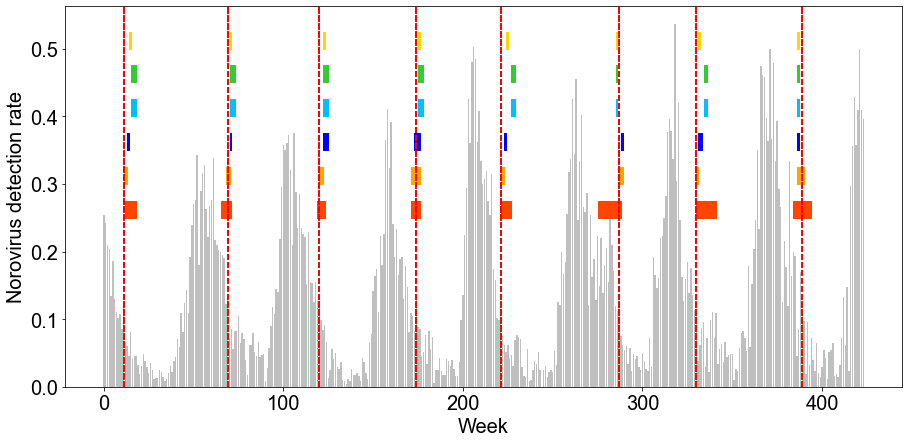

In [96]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

tmp=[pd.DataFrame() for x in range(8)] # for real
df_GRU=[pd.DataFrame() for x in range(8)]
df_LSTM=[pd.DataFrame() for x in range(8)]
df_SVM=[pd.DataFrame() for x in range(8)]
df_MLP=[pd.DataFrame() for x in range(8)]
df_RF=[pd.DataFrame() for x in range(8)]
df_GB=[pd.DataFrame() for x in range(8)]

end_LSTM=[pd.DataFrame() for x in range(8)]
end_GRU=[pd.DataFrame() for x in range(8)]
end_SVM=[pd.DataFrame() for x in range(8)]
end_MLP=[pd.DataFrame() for x in range(8)]
end_RF=[pd.DataFrame() for x in range(8)]
end_GB=[pd.DataFrame() for x in range(8)]


#label
GRU_patch=mpatches.Patch(color='orangered',label='GRU')
LSTM_patch=mpatches.Patch(color='orange',label='GRU')
SVM_patch=mpatches.Patch(color='gold',label='SVM')
MLP_patch=mpatches.Patch(color='limegreen',label='MLP')
RF_patch=mpatches.Patch(color='deepskyblue',label='RF')
GB_patch=mpatches.Patch(color='blue',label='GB')

fig,ax=plt.subplots(figsize=(15,7))
x=range(len(GRU_train))
y=data_train['Rate']
# plt.plot(data_train.index,y,color='b',alpha=0.5)
plt.bar(data_train.index,y,color='gray',alpha=0.5)
# plt.fill_between(x,y,color='g',alpha=0.3)

for i in range(0,8):

    df_GRU[i]=GRU_train[GRU_train['Year']==i+2009]
    df_LSTM[i]=LSTM_train[LSTM_train['Year']==i+2009]
    df_SVM[i]=SVM_train[SVM_train['Year']==i+2009]
    df_MLP[i]=MLP_train[MLP_train['Year']==i+2009]
    df_RF[i]=RF_train[SVM_train['Year']==i+2009]
    df_GB[i]=GB_train[GB_train['Year']==i+2009]
    tmp[i]=df_GRU[i][df_GRU[i]['warning']==0] #real warning

    
    end_GRU[i]=df_GRU[i][df_GRU[i]['alarm']=='end']
    end_LSTM[i]=df_LSTM[i][df_LSTM[i]['alarm']=='end']
    end_SVM[i]=df_SVM[i][df_SVM[i]['alarm']=='end']
    end_MLP[i]=df_MLP[i][df_MLP[i]['alarm']=='end']
    end_RF[i]=df_RF[i][df_RF[i]['alarm']=='end']
    end_GB[i]=df_GB[i][df_GB[i]['alarm']=='end']
    
    for iter in range(len(df_list[i])):
        s1=int(tmp[i].head(1).index.values-1)
        plt.axvline(s1,color='red',linestyle='--')
        
        x_GRU=int(end_GRU[i].head(1).index.values)
        w_GRU=len(end_GRU[i])
        
        x_LSTM=int(end_LSTM[i].head(1).index.values)
        w_LSTM=len(end_LSTM[i])
        
        x_SVM=int(end_SVM[i].head(1).index.values)
        w_SVM=len(end_SVM[i])
        
        x_MLP=int(end_MLP[i].head(1).index.values)
        w_MLP=len(end_MLP[i])
        
        x_GB=int(end_GB[i].head(1).index.values)
        w_GB=len(end_GB[i])
        
        x_RF=int(end_RF[i].head(1).index.values)
        w_RF=len(end_RF[i])        
        
        yy=0.5
        kk=0.05
        h=0.025
        
        SVM_rec=patches.Rectangle((x_SVM,yy),w_SVM,h,color='gold')
        plt.gca().add_patch(SVM_rec)
        
        MLP_rec=patches.Rectangle((x_MLP,yy-kk),w_MLP,h,color='limegreen')
        plt.gca().add_patch(MLP_rec)
        
        RF_rec=patches.Rectangle((x_RF,yy-2*kk),w_RF,h,color='deepskyblue')
        plt.gca().add_patch(RF_rec)

        GB_rec=patches.Rectangle((x_GB,yy-3*kk),w_GB,h,color='blue')
        plt.gca().add_patch(GB_rec)
        
        LSTM_rec=patches.Rectangle((x_LSTM,yy-4*kk),w_LSTM,h,color='orange')
        plt.gca().add_patch(LSTM_rec)
        
        
        GRU_rec=patches.Rectangle((x_GRU,yy-5*kk),w_GRU,0.025,color='orangered')
        plt.gca().add_patch(GRU_rec)
        
plt.xlabel('Week')
plt.ylabel('Norovirus detection rate')
# plt.legend(handles=[SVM_patch, MLP_patch, RF_patch, GB_patch, LSTM_patch, GRU_patch],loc='upper right')
plt.savefig('sup_b.tiff',dpi=300,facecolor='white',bbox_inches='tight')

# start_test

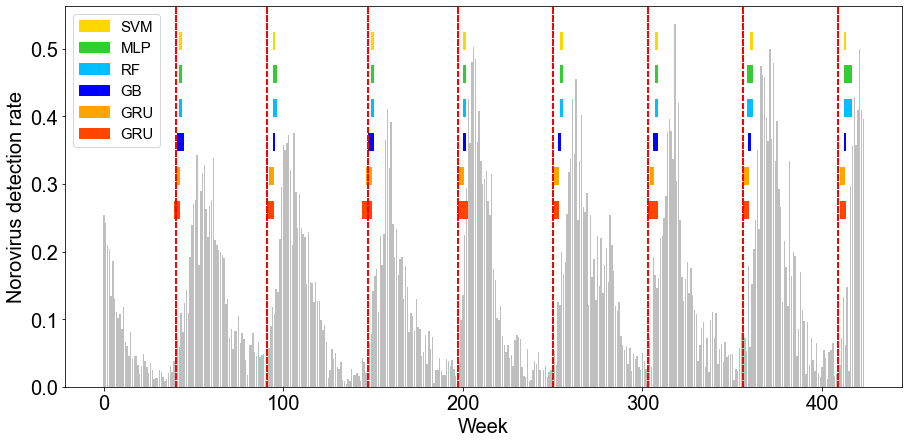

In [97]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=15)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

tmp=[pd.DataFrame() for x in range(8)] # for real
df_GRU=[pd.DataFrame() for x in range(8)]
df_LSTM=[pd.DataFrame() for x in range(8)]
df_SVM=[pd.DataFrame() for x in range(8)]
df_MLP=[pd.DataFrame() for x in range(8)]
df_RF=[pd.DataFrame() for x in range(8)]
df_GB=[pd.DataFrame() for x in range(8)]

start_LSTM=[pd.DataFrame() for x in range(8)]
start_GRU=[pd.DataFrame() for x in range(8)]
start_SVM=[pd.DataFrame() for x in range(8)]
start_MLP=[pd.DataFrame() for x in range(8)]
start_RF=[pd.DataFrame() for x in range(8)]
start_GB=[pd.DataFrame() for x in range(8)]


#label
GRU_patch=mpatches.Patch(color='orangered',label='GRU')
LSTM_patch=mpatches.Patch(color='orange',label='GRU')
SVM_patch=mpatches.Patch(color='gold',label='SVM')
MLP_patch=mpatches.Patch(color='limegreen',label='MLP')
RF_patch=mpatches.Patch(color='deepskyblue',label='RF')
GB_patch=mpatches.Patch(color='blue',label='GB')

fig,ax=plt.subplots(figsize=(15,7))
x=range(len(GRU_train))
y=data_train['Rate']
# plt.plot(data_train.index,y,color='b',alpha=0.5)
plt.bar(data_train.index,y,color='gray',alpha=0.5)
# plt.fill_between(x,y,color='g',alpha=0.3)

for i in range(0,8):

    df_GRU[i]=GRU_train[GRU_train['Year']==i+2009]
    df_LSTM[i]=LSTM_train[LSTM_train['Year']==i+2009]
    df_SVM[i]=SVM_train[SVM_train['Year']==i+2009]
    df_MLP[i]=MLP_train[MLP_train['Year']==i+2009]
    df_RF[i]=RF_train[SVM_train['Year']==i+2009]
    df_GB[i]=GB_train[GB_train['Year']==i+2009]
    tmp[i]=df_GRU[i][df_GRU[i]['warning']==0] #real warning

    
    start_GRU[i]=df_GRU[i][df_GRU[i]['alarm']=='start']
    start_LSTM[i]=df_LSTM[i][df_LSTM[i]['alarm']=='start']
    start_SVM[i]=df_SVM[i][df_SVM[i]['alarm']=='start']
    start_MLP[i]=df_MLP[i][df_MLP[i]['alarm']=='start']
    start_RF[i]=df_RF[i][df_RF[i]['alarm']=='start']
    start_GB[i]=df_GB[i][df_GB[i]['alarm']=='start']
    
    for iter in range(len(df_list[i])):
        s1=int(tmp[i].tail(1).index.values)
        plt.axvline(s1,color='red',linestyle='--')
        
        x_GRU=int(start_GRU[i].head(1).index.values)
        w_GRU=len(start_GRU[i])
        
        x_LSTM=int(start_LSTM[i].head(1).index.values)
        w_LSTM=len(start_LSTM[i])
        
        x_SVM=int(start_SVM[i].head(1).index.values)
        w_SVM=len(start_SVM[i])
        
        x_MLP=int(start_MLP[i].head(1).index.values)
        w_MLP=len(start_MLP[i])
        
        x_GB=int(start_GB[i].head(1).index.values)
        w_GB=len(start_GB[i])
        
        x_RF=int(start_RF[i].head(1).index.values)
        w_RF=len(start_RF[i])        
        
        yy=0.5
        kk=0.05
        h=0.025
        
        SVM_rec=patches.Rectangle((x_SVM,yy),w_SVM,h,color='gold')
        plt.gca().add_patch(SVM_rec)
        
        MLP_rec=patches.Rectangle((x_MLP,yy-kk),w_MLP,h,color='limegreen')
        plt.gca().add_patch(MLP_rec)
        
        RF_rec=patches.Rectangle((x_RF,yy-2*kk),w_RF,h,color='deepskyblue')
        plt.gca().add_patch(RF_rec)

        GB_rec=patches.Rectangle((x_GB,yy-3*kk),w_GB,h,color='blue')
        plt.gca().add_patch(GB_rec)
        
        LSTM_rec=patches.Rectangle((x_LSTM,yy-4*kk),w_LSTM,h,color='orange')
        plt.gca().add_patch(LSTM_rec)
        
        
        GRU_rec=patches.Rectangle((x_GRU,yy-5*kk),w_GRU,0.025,color='orangered')
        plt.gca().add_patch(GRU_rec)
        
plt.xlabel('Week')
plt.ylabel('Norovirus detection rate')
plt.legend(handles=[SVM_patch, MLP_patch, RF_patch, GB_patch, LSTM_patch, GRU_patch],loc='upper left')
plt.savefig('sup_a.tiff',dpi=300,facecolor='white',bbox_inches='tight')